# SPRINT 4 - PROJECT


-----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Respuesta. 

El propósito del proyecto es saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad. 
Planeo analizar la información de las diferentes tablas, buscar valores duplicados, nulos, errores en la ortografía, que se cumpla el 'snake-case', leer las tablas correctamente y hacer algunas modificaciones en caso de ser necesario.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv') 
internet = pd.read_csv('/datasets/megaline_internet.csv') 
messages = pd.read_csv('/datasets/megaline_messages.csv') 
plans = pd.read_csv('/datasets/megaline_plans.csv') 
users = pd.read_csv('/datasets/megaline_users.csv') 


## Preparar los datos

### calls

In [3]:
calls.info()
print()
print()
calls.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB




,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### internet

In [4]:
internet.info()
print()
print()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB




,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### messages

In [5]:
messages.info()
print()
print()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB




,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### plans

In [6]:
plans.info()
print()
print()
plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes




,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### users

In [7]:
users.info()
print()
print()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB




,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Tarifas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [9]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Respuesta

La compañía tiene dos planes: 
    - surf: el costo es de 20 usd al mes
    - ultimate: el costo es de 70 usd al mes

Las tablas en general no contienen errores ni datos ausentes, (los únicos datos ausentes tienen sentido que no tengan un valor) el problema principal lo puedo observar en que varias de las tablas contienen información del tipo fecha y vienen cargadas como 'object' por lo que es necesario pasarlas a su formato adecuado. 

Además, anticipandome un poco me gustaría renombrar algunas columnas por si tengo que hacer una fusion de tablas y para que tenga mas sentido la información.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [11]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [12]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [14]:
users['churn_date'] = pd.to_datetime(users['churn_date'])

## Enriquecer los datos

### Respuesta

Voy a renombrar algunas columnas y para manipular mejor la informacion voy a agregar columnas con el consumo de 'mb a gb' 

In [15]:
users.rename(columns={'plan': 'plan_name'}, inplace=True)

In [16]:
internet['gb_used'] = internet['mb_used'] / 1024

In [17]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

## Usuarios/as

In [18]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [19]:
# Imprime una muestra de datos para usuarios
users.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


### Corregir los datos

### Respuesta

En las líneas de código anteriores corregí los problemas de todas las tablas, me aseguré que todas tuvieran el formato correcto para después pasar al analisis. 

### Enriquecer los datos

### Respuesta

En las líneas de código anteriores corregí los problemas de todas las tablas, me aseguré que todas las columnas tuvieran nombres que hicieran mayor sentido, facilitaran la fusion de tablas posterior y agregar columnas que expresen los datos que se van a utilizar para el analisis.

## Llamadas

In [20]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [21]:
# Imprime una muestra de datos para las llamadas
calls.head(15)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


### Corregir los datos

### Respuesta

Los datos de las fechas estaban expresados en 'object' y se modificaron para que tuvieran el formato 'to date_time' para mejorar su entendimiento 

### Enriquecer los datos

### Respuesta

Por el momento en la tabla 'calls' no vi la necesidad de hacer mas modificaciones para enriquecer los datos, pero posteriormente cambié el nombre de una columna y agregué algunas otras que expresaban los datos necesarios.

## Mensajes

In [22]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [23]:
# Imprime una muestra de datos para los mensajes
messages.head(15)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


### Corregir los datos

### Respuesta

Los valores de la columna message_date los cambie para expresarlos en el formato adecuado correspondiente a fechas.

### Enriquecer los datos

### Respuesta

Por lo pronto no vi en la necesidad de hacer mas modificaciones de las que ya he realizado hasta este punto.

## Internet

In [24]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.0+ MB


In [25]:
# Imprime una muestra de datos para el tráfico de internet
internet.head(15)

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590
5,1001_0,1001,2018-08-24,284.68,0.278008
6,1001_3,1001,2018-12-09,656.04,0.640664
7,1001_4,1001,2018-11-04,16.97,0.016572
8,1001_10,1001,2018-11-27,135.18,0.132012
9,1001_15,1001,2018-12-13,761.92,0.744062


### Corregir los datos

### Respuesta

Los valores de la columna message_date los cambie para expresarlos en el formato adecuado correspondiente a fechas.

### Enriquecer los datos

### Respuesta

Además de los cambios de valores a tipo fecha, me parecio importante agregar la columna 'gb_used' con la conversión de mb a gb tomando como referencia la columna 'mb_used' y haciendo la conversión ( / 1024 )

## Estudiar las condiciones de las tarifas

In [26]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario



In [27]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['month'] = calls['call_date'].dt.to_period('M').dt.start_time
calls_per_user_per_month = calls.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_per_user_per_month = calls_per_user_per_month.rename(columns={'id': 'call_count'})

calls_per_user_per_month

,user_id,month,call_count
0,1000,2018-12-01,16
1,1001,2018-08-01,27
2,1001,2018-09-01,49
3,1001,2018-10-01,65
4,1001,2018-11-01,64
...,...,...,...
2253,1498,2018-12-01,39
2254,1499,2018-09-01,41
2255,1499,2018-10-01,53
2256,1499,2018-11-01,45


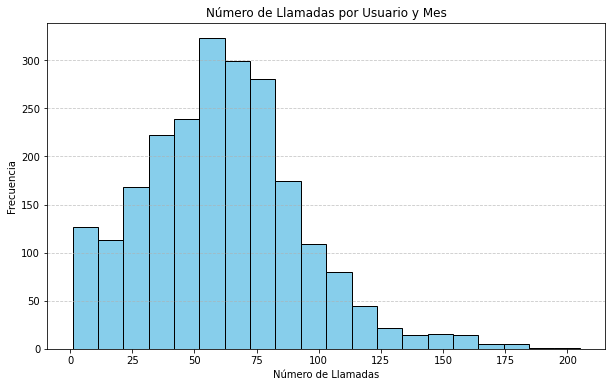

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(calls_per_user_per_month['call_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Número de Llamadas por Usuario y Mes')
plt.xlabel('Número de Llamadas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls['duration'] = np.ceil(calls['duration'])

minutes_per_user_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutes_per_user_per_month.rename(columns={'duration' : 'total_minutes'}, inplace = True)
minutes_per_user_per_month


,user_id,month,total_minutes
0,1000,2018-12-01,124.0
1,1001,2018-08-01,182.0
2,1001,2018-09-01,315.0
3,1001,2018-10-01,393.0
4,1001,2018-11-01,426.0
...,...,...,...
2253,1498,2018-12-01,339.0
2254,1499,2018-09-01,346.0
2255,1499,2018-10-01,385.0
2256,1499,2018-11-01,308.0


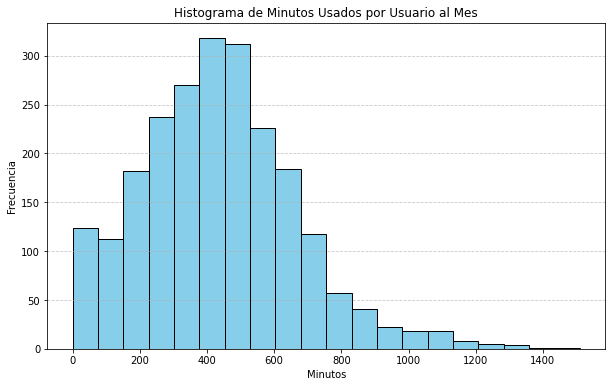

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(minutes_per_user_per_month['total_minutes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Minutos Usados por Usuario al Mes')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month'] = messages['message_date'].dt.to_period('M').dt.start_time
messages_per_user_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_per_user_per_month.rename(columns = {'id' : 'messages_count'}, inplace = True)

messages_per_user_per_month

,user_id,month,messages_count
0,1000,2018-12-01,11
1,1001,2018-08-01,30
2,1001,2018-09-01,44
3,1001,2018-10-01,53
4,1001,2018-11-01,36
...,...,...,...
1801,1496,2018-09-01,21
1802,1496,2018-10-01,18
1803,1496,2018-11-01,13
1804,1496,2018-12-01,11


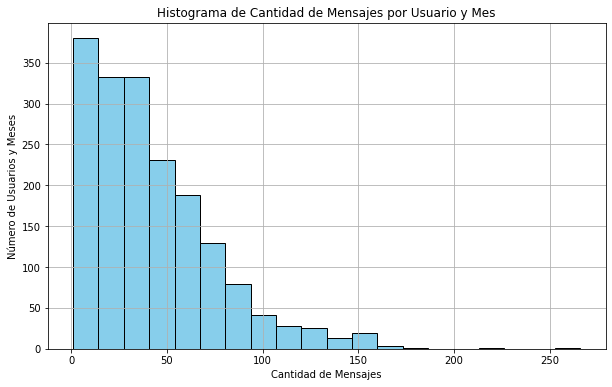

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(messages_per_user_per_month['messages_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Cantidad de Mensajes por Usuario y Mes')
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Número de Usuarios y Meses')
plt.grid(True)
plt.show()

In [33]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['gb_used'] = np.ceil(internet['mb_used'] / 1024)
internet['month'] = internet['session_date'].dt.to_period('M').dt.start_time
internet_per_user_per_month = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()
internet_per_user_per_month.rename(columns={'gb_used': 'gb_used_total'}, inplace=True)

internet_per_user_per_month

,user_id,month,gb_used_total
0,1000,2018-12-01,4.0
1,1001,2018-08-01,21.0
2,1001,2018-09-01,41.0
3,1001,2018-10-01,50.0
4,1001,2018-11-01,49.0
...,...,...,...
2272,1498,2018-12-01,56.0
2273,1499,2018-09-01,37.0
2274,1499,2018-10-01,52.0
2275,1499,2018-11-01,43.0


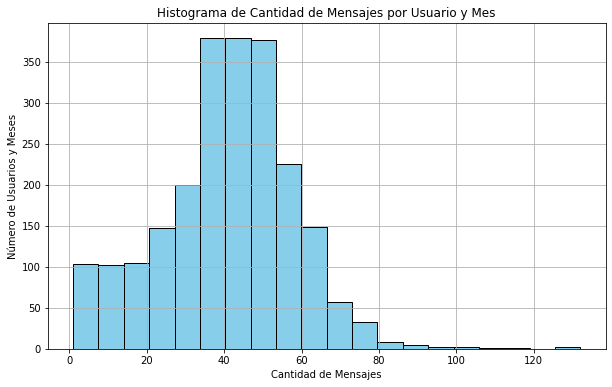

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(internet_per_user_per_month['gb_used_total'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Cantidad de Mensajes por Usuario y Mes')
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Número de Usuarios y Meses')
plt.grid(True)
plt.show()

In [35]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

merged_data = calls_per_user_per_month.merge(minutes_per_user_per_month, on=['user_id', 'month'], how = 'outer')
merged_data = merged_data.merge(messages_per_user_per_month, on=['user_id', 'month'], how = 'outer')
merged_data = merged_data.merge(internet_per_user_per_month, on=['user_id', 'month'], how = 'outer')

merged_data.fillna(0, inplace = True)

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         2293 non-null   int64         
 1   month           2293 non-null   datetime64[ns]
 2   call_count      2293 non-null   float64       
 3   total_minutes   2293 non-null   float64       
 4   messages_count  2293 non-null   float64       
 5   gb_used_total   2293 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 125.4 KB


In [36]:
merged_data

,user_id,month,call_count,total_minutes,messages_count,gb_used_total
0,1000,2018-12-01,16.0,124.0,11.0,4.0
1,1001,2018-08-01,27.0,182.0,30.0,21.0
2,1001,2018-09-01,49.0,315.0,44.0,41.0
3,1001,2018-10-01,65.0,393.0,53.0,50.0
4,1001,2018-11-01,64.0,426.0,36.0,49.0
...,...,...,...,...,...,...
2288,1349,2018-12-01,0.0,0.0,61.0,27.0
2289,1361,2018-05-01,0.0,0.0,2.0,7.0
2290,1482,2018-10-01,0.0,0.0,2.0,0.0
2291,1108,2018-12-01,0.0,0.0,0.0,2.0


In [37]:
# Añade la información de la tarifa
merged_data = pd.merge(merged_data, users[['user_id', 'plan_name']], on = 'user_id', how = 'left')
merged_data = pd.merge(merged_data, plans, on = 'plan_name', how = 'left')

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   datetime64[ns]
 2   call_count             2293 non-null   float64       
 3   total_minutes          2293 non-null   float64       
 4   messages_count         2293 non-null   float64       
 5   gb_used_total          2293 non-null   float64       
 6   plan_name              2293 non-null   object        
 7   messages_included      2293 non-null   int64         
 8   mb_per_month_included  2293 non-null   int64         
 9   minutes_included       2293 non-null   int64         
 10  usd_monthly_pay        2293 non-null   int64         
 11  usd_per_gb             2293 non-null   int64         
 12  usd_per_message        2293 non-null   float64       
 13  usd

In [38]:
merged_data

,user_id,month,call_count,total_minutes,messages_count,gb_used_total,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-12-01,16.0,124.0,11.0,4.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
1,1001,2018-08-01,27.0,182.0,30.0,21.0,surf,50,15360,500,20,10,0.03,0.03,15.0
2,1001,2018-09-01,49.0,315.0,44.0,41.0,surf,50,15360,500,20,10,0.03,0.03,15.0
3,1001,2018-10-01,65.0,393.0,53.0,50.0,surf,50,15360,500,20,10,0.03,0.03,15.0
4,1001,2018-11-01,64.0,426.0,36.0,49.0,surf,50,15360,500,20,10,0.03,0.03,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-12-01,0.0,0.0,61.0,27.0,surf,50,15360,500,20,10,0.03,0.03,15.0
2289,1361,2018-05-01,0.0,0.0,2.0,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0
2290,1482,2018-10-01,0.0,0.0,2.0,0.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
2291,1108,2018-12-01,0.0,0.0,0.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0


In [39]:
# Calcula el ingreso mensual para cada usuario
merged_data['excess_minutes'] = merged_data['total_minutes'] - merged_data['minutes_included']
merged_data['excess_minutes'] = merged_data['excess_minutes'].where(merged_data['excess_minutes'] > 0, 0)
merged_data['excess_messages'] = merged_data['messages_count'] - merged_data['messages_included']
merged_data['excess_messages'] = merged_data['excess_messages'].where(merged_data['excess_messages'] > 0, 0)
merged_data['excess_gb'] = merged_data['gb_used_total'] - merged_data['gb_per_month_included']
merged_data['excess_gb'] = merged_data['excess_gb'].where(merged_data['excess_gb'] > 0, 0)

merged_data['income'] = merged_data['usd_monthly_pay'] \
    + merged_data['excess_minutes'] * merged_data['usd_per_minute'] \
    + merged_data['excess_messages'] * merged_data['usd_per_message'] \
    + merged_data['excess_gb'] * merged_data['usd_per_gb']

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   datetime64[ns]
 2   call_count             2293 non-null   float64       
 3   total_minutes          2293 non-null   float64       
 4   messages_count         2293 non-null   float64       
 5   gb_used_total          2293 non-null   float64       
 6   plan_name              2293 non-null   object        
 7   messages_included      2293 non-null   int64         
 8   mb_per_month_included  2293 non-null   int64         
 9   minutes_included       2293 non-null   int64         
 10  usd_monthly_pay        2293 non-null   int64         
 11  usd_per_gb             2293 non-null   int64         
 12  usd_per_message        2293 non-null   float64       
 13  usd

In [40]:
merged_data

,user_id,month,call_count,total_minutes,messages_count,gb_used_total,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,excess_minutes,excess_messages,excess_gb,income
0,1000,2018-12-01,16.0,124.0,11.0,4.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.00
1,1001,2018-08-01,27.0,182.0,30.0,21.0,surf,50,15360,500,20,10,0.03,0.03,15.0,0.0,0.0,6.0,80.00
2,1001,2018-09-01,49.0,315.0,44.0,41.0,surf,50,15360,500,20,10,0.03,0.03,15.0,0.0,0.0,26.0,280.00
3,1001,2018-10-01,65.0,393.0,53.0,50.0,surf,50,15360,500,20,10,0.03,0.03,15.0,0.0,3.0,35.0,370.09
4,1001,2018-11-01,64.0,426.0,36.0,49.0,surf,50,15360,500,20,10,0.03,0.03,15.0,0.0,0.0,34.0,360.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-12-01,0.0,0.0,61.0,27.0,surf,50,15360,500,20,10,0.03,0.03,15.0,0.0,11.0,12.0,140.33
2289,1361,2018-05-01,0.0,0.0,2.0,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0,20.00
2290,1482,2018-10-01,0.0,0.0,2.0,0.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.00
2291,1108,2018-12-01,0.0,0.0,0.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.00


## Estudia el comportamiento de usuario

### Llamadas

In [41]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
pivot_table = pd.pivot_table(merged_data, index = ['plan_name', 'month'], values = 'total_minutes', aggfunc = 'mean')
pivot_table


total_minutes
plan_name month                    
surf      2018-01-01     203.000000
          2018-02-01     297.000000
          2018-03-01     330.000000
          2018-04-01     351.540000
          2018-05-01     399.584416
          2018-06-01     431.298969
          2018-07-01     449.983471
          2018-08-01     410.111111
          2018-09-01     414.226804
          2018-10-01     429.729958
          2018-11-01     423.325088
          2018-12-01     473.836478
ultimate  2018-01-01     193.500000
          2018-02-01     403.142857
          2018-03-01     304.250000
          2018-04-01     336.857143
          2018-05-01     406.241379
          2018-06-01     370.957447
          2018-07-01     427.067797
          2018-08-01     421.436620
          2018-09-01     437.511628
          2018-10-01     450.735849
          2018-11-01     445.196850
          2018-12-01     459.099338

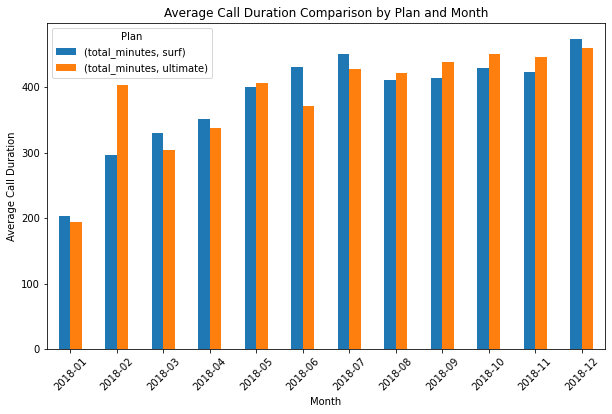

In [42]:
pivot_table.index = pivot_table.index.set_levels(pivot_table.index.levels[1].strftime('%Y-%m'), level = 1)

pivot_table.unstack('plan_name').plot(kind = 'bar', figsize = (10, 6))
plt.xlabel('Month')
plt.ylabel('Average Call Duration')
plt.title('Average Call Duration Comparison by Plan and Month')
plt.xticks(rotation = 45)
plt.legend(title = 'Plan')

plt.show()



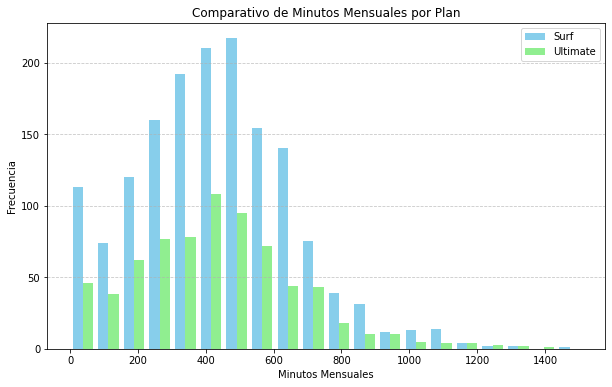

In [43]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_minutes = merged_data[merged_data['plan_name'] == 'surf']['total_minutes']
ultimate_minutes = merged_data[merged_data['plan_name'] == 'ultimate']['total_minutes']

plt.figure(figsize=(10, 6))

plt.hist([surf_minutes, ultimate_minutes], bins = 20, color = ['skyblue', 'lightgreen'], label = ['Surf', 'Ultimate'])

plt.xlabel('Minutos Mensuales')
plt.ylabel('Frecuencia')
plt.title('Comparativo de Minutos Mensuales por Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()

In [44]:
# Calcula la media y la varianza de la duración mensual de llamadas.
grouped_by_month = merged_data.groupby('month')

mean = merged_data.groupby('month')['total_minutes'].mean()
variance = merged_data.groupby('month')['total_minutes'].var()

result = pd.DataFrame({'mean': mean, 'variance': variance})
result


,mean,variance
month,,
2018-01-01,196.666667,13135.866667
2018-02-01,343.437500,61567.329167
2018-03-01,321.171429,43378.499160
2018-04-01,347.197183,45620.531992
2018-05-01,401.405660,54950.510063
2018-06-01,411.604167,45086.240822
2018-07-01,442.472222,64525.781347
2018-08-01,413.562232,53926.747188
2018-09-01,421.378571,49735.899181


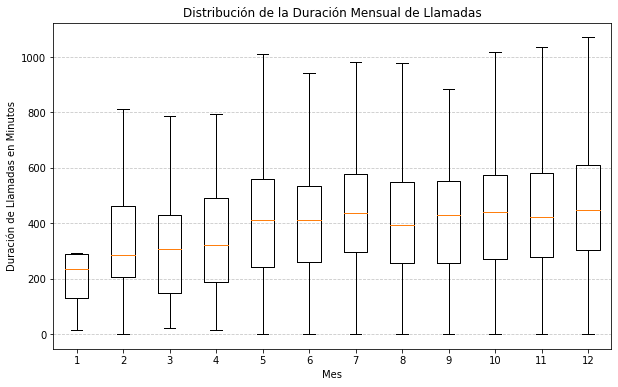

In [45]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
duration_data = merged_data[['month', 'total_minutes']]

plt.figure(figsize = (10, 6))
plt.boxplot(duration_data.groupby('month')['total_minutes'].apply(list).values, showfliers = False)

plt.title('Distribución de la Duración Mensual de Llamadas')
plt.xlabel('Mes')
plt.ylabel('Duración de Llamadas en Minutos')
plt.xticks(range (1, 13), [str(month) for month in range (1, 13)])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [46]:
merged_data.head()

,user_id,month,call_count,total_minutes,messages_count,gb_used_total,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,excess_minutes,excess_messages,excess_gb,income
0,1000,2018-12-01,16.0,124.0,11.0,4.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.00
1,1001,2018-08-01,27.0,182.0,30.0,21.0,surf,50,15360,500,20,10,0.03,0.03,15.0,0.0,0.0,6.0,80.00
2,1001,2018-09-01,49.0,315.0,44.0,41.0,surf,50,15360,500,20,10,0.03,0.03,15.0,0.0,0.0,26.0,280.00
3,1001,2018-10-01,65.0,393.0,53.0,50.0,surf,50,15360,500,20,10,0.03,0.03,15.0,0.0,3.0,35.0,370.09
4,1001,2018-11-01,64.0,426.0,36.0,49.0,surf,50,15360,500,20,10,0.03,0.03,15.0,0.0,0.0,34.0,360.00


### Respuesta

Con respecto a las llamadas el comportamiento de los usuarios varía en función del plan, algunos de los usuarios del plan 'surf' parecen exceder mas el límite de minutos con el que cuentan en su plan (500 minutos al mes) mientras que pocos en proporcion de los usuarios del plan 'ultimate' no exceden con su cuota de minutos permitidos dentro de su plan (3000 minutos al mes). Esto tiene cierta logica, debido a que los usuarios del plan 'ultimate' cuentan con una cantidad mucho mayor de minutos incluidos para llamadas.

### Mensajes

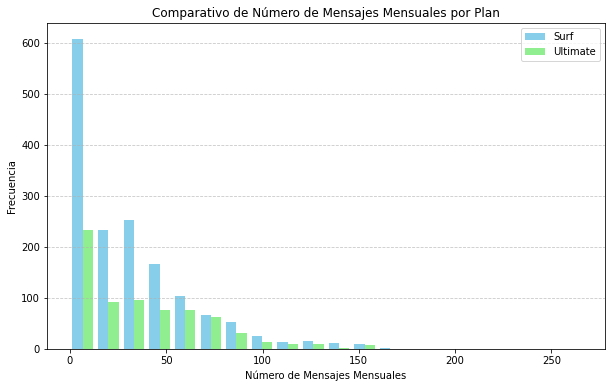

In [47]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
surf_messages = merged_data[merged_data['plan_name'] == 'surf']['messages_count']
ultimate_messages = merged_data[merged_data['plan_name'] == 'ultimate']['messages_count']

plt.figure(figsize=(10, 6))
plt.hist([surf_messages, ultimate_messages], bins=20, color=['skyblue', 'lightgreen'], label=['Surf', 'Ultimate'])

plt.xlabel('Número de Mensajes Mensuales')
plt.ylabel('Frecuencia')
plt.title('Comparativo de Número de Mensajes Mensuales por Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()


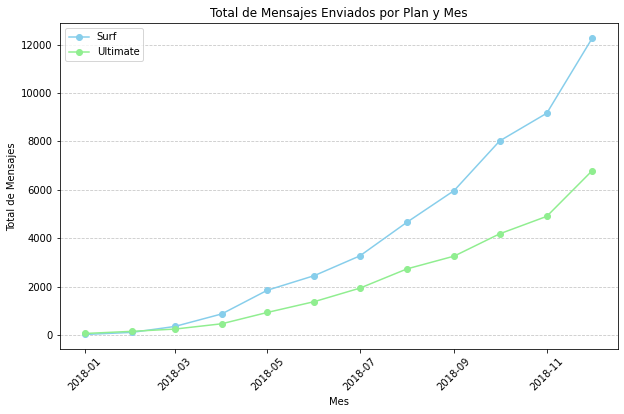

In [48]:
surf_messages = merged_data[merged_data['plan_name'] == 'surf']
ultimate_messages = merged_data[merged_data['plan_name'] == 'ultimate']

surf_messages_per_month = surf_messages.groupby('month')['messages_count'].sum().reset_index()
ultimate_messages_per_month = ultimate_messages.groupby('month')['messages_count'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(surf_messages_per_month['month'], surf_messages_per_month['messages_count'], label='Surf', marker='o', color='skyblue')
plt.plot(ultimate_messages_per_month['month'], ultimate_messages_per_month['messages_count'], label='Ultimate', marker='o', color='lightgreen')

plt.xlabel('Mes')
plt.ylabel('Total de Mensajes')
plt.title('Total de Mensajes Enviados por Plan y Mes')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.show()

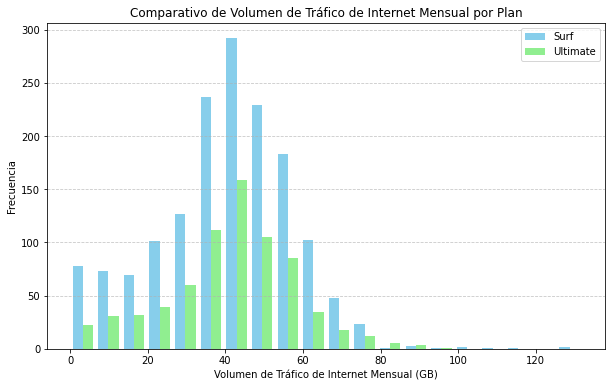

In [49]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
surf_internet = merged_data[merged_data['plan_name'] == 'surf']['gb_used_total']
ultimate_internet = merged_data[merged_data['plan_name'] == 'ultimate']['gb_used_total']

plt.figure(figsize=(10, 6))
plt.hist([surf_internet, ultimate_internet], bins=20, color=['skyblue', 'lightgreen'], label=['Surf', 'Ultimate'])

plt.xlabel('Volumen de Tráfico de Internet Mensual (GB)')
plt.ylabel('Frecuencia')
plt.title('Comparativo de Volumen de Tráfico de Internet Mensual por Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()


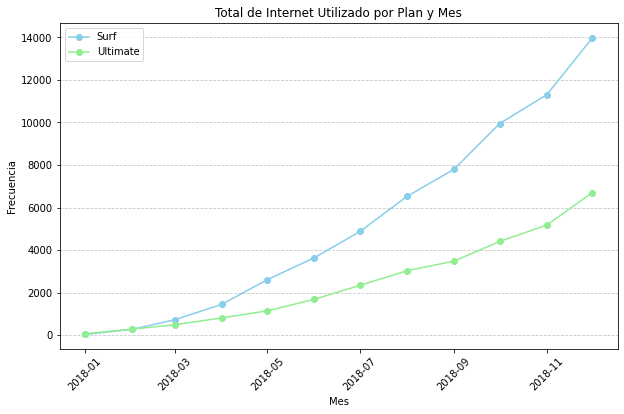

In [60]:
surf_data = merged_data[merged_data['plan_name'] == 'surf']
ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']

surf_gb_per_month = surf_data.groupby('month')['gb_used_total'].sum().reset_index()
ultimate_gb_per_month = ultimate_data.groupby('month')['gb_used_total'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(surf_gb_per_month['month'], surf_gb_per_month['gb_used_total'], label='Surf', marker='o', color='skyblue')
plt.plot(ultimate_gb_per_month['month'], ultimate_gb_per_month['gb_used_total'], label='Ultimate', marker='o', color='lightgreen')

plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Total de Internet Utilizado por Plan y Mes')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.show()

### Respuesta

Asi como en el ejemplo anterior, los usuarios del plan 'surf' utilizan mucho más el servicio de SMS que los usuarios del plan 'ultimate', a pesar de que estos ultimos tienen 1000 SMS incluidos en su plan parece que no utilizan tantos, mientras que los usuarios del plan 'surf' solamente tienen 50 SMS incluidos lo que puede parecer que rapidamente cubren su cuota.

### Internet

### Respuesta

Los usuarios del plan 'surf' tienen incluidos en su plan 15 GB, mientras que los usuarios del plan 'ultimate' tienen 30 GB. Obtuve una media (promedio) del uso de internet para cada mes, para ambos planes y aunque se puede observar que no hay una diferencia significativa si podemos afirmar que en la mayoria de los casos, son los usuarios del plan 'ultimate' quienes utilizan mas sus GB incluidos en comparacion con los usuarios de 'surf' que quiza al verse mas limitados en su plan consumen menos datos y utilizan mas wifi. 

In [51]:
# Comparativo del promedio de total de internet utilizado por cada plan para cada mes
pivot_table = pd.pivot_table(merged_data, index = ['plan_name', 'month'], values = 'gb_used_total', aggfunc = 'mean')
pivot_table

gb_used_total
plan_name month                    
surf      2018-01-01      14.000000
          2018-02-01      30.000000
          2018-03-01      31.260870
          2018-04-01      28.880000
          2018-05-01      33.844156
          2018-06-01      37.515464
          2018-07-01      40.264463
          2018-08-01      40.277778
          2018-09-01      40.221649
          2018-10-01      41.987342
          2018-11-01      39.957597
          2018-12-01      43.949686
ultimate  2018-01-01      15.250000
          2018-02-01      39.714286
          2018-03-01      40.250000
          2018-04-01      38.428571
          2018-05-01      39.310345
          2018-06-01      35.851064
          2018-07-01      39.644068
          2018-08-01      42.619718
          2018-09-01      40.465116
          2018-10-01      41.556604
          2018-11-01      40.732283
          2018-12-01      44.377483

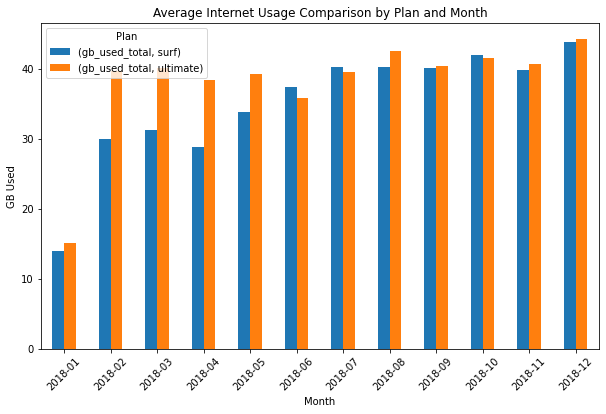

In [52]:
pivot_table.index = pivot_table.index.set_levels(pivot_table.index.levels[1].strftime('%Y-%m'), level = 1)

pivot_table.unstack('plan_name').plot(kind = 'bar', figsize = (10, 6))
plt.xlabel('Month')
plt.ylabel('GB Used')
plt.title('Average Internet Usage Comparison by Plan and Month')
plt.xticks(rotation = 45)
plt.legend(title = 'Plan')

plt.show()


## Ingreso

In [53]:
surf_revenue = merged_data[merged_data['plan_name'] == 'surf']['income']
ultimate_revenue = merged_data[merged_data['plan_name'] == 'ultimate']['income']

In [54]:
min_surf_revenue = surf_revenue.min()
max_surf_revenue = surf_revenue.max()
sum_surf_revenue = surf_revenue.sum()
mean_surf_revenue = surf_revenue.mean()

min_ultimate_revenue = ultimate_revenue.min()
max_ultimate_revenue = ultimate_revenue.max()
sum_ultimate_revenue = ultimate_revenue.sum()
mean_ultimate_revenue = ultimate_revenue.mean()

print(f'Estadísticas para surf_revenue:\n'
      f'Mínimo: {min_surf_revenue}\n'
      f'Máximo: {max_surf_revenue}\n'
      f'Suma: {sum_surf_revenue}\n'
      f'Promedio: {mean_surf_revenue}\n')

print(f'Estadísticas para ultimate_revenue:\n'
      f'Mínimo: {min_ultimate_revenue}\n'
      f'Máximo: {max_ultimate_revenue}\n'
      f'Suma: {sum_ultimate_revenue}\n'
      f'Promedio: {mean_ultimate_revenue}\n')

Estadísticas para surf_revenue:
Mínimo: 20.0
Máximo: 1210.37
Suma: 443771.18000000005
Promedio: 282.11772409408775

Estadísticas para ultimate_revenue:
Mínimo: 70.0
Máximo: 532.0
Suma: 119973.0
Promedio: 166.62916666666666



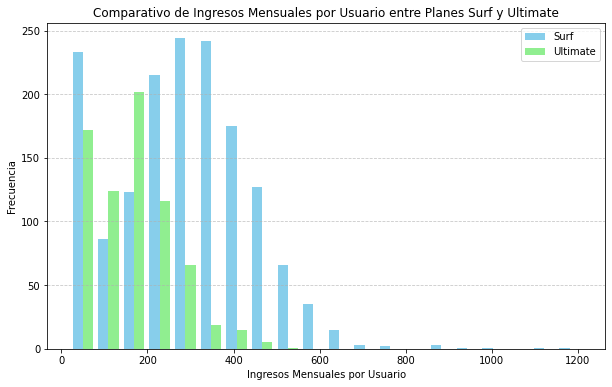

In [55]:
plt.figure(figsize=(10, 6))
plt.hist([surf_revenue, ultimate_revenue], bins=20, color=['skyblue', 'lightgreen'], label=['Surf', 'Ultimate'])

plt.xlabel('Ingresos Mensuales por Usuario')
plt.ylabel('Frecuencia')
plt.title('Comparativo de Ingresos Mensuales por Usuario entre Planes Surf y Ultimate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()

### Respuesta

El plan surf tiene genera mayor cantidad de ingresos contra el plan ultimate, la conclusión que podemos obtener hasta este momento es que quiza los usuarios del plan surf son mayor en cantidad y exceden constantemente los limites de su paquete (llamadas, sms, internet) por lo que incurren a gastos extra, que aunque su cuota es significativamente menor (20 usd) son estos excedentes los que hacen que este plan genere mayor cantidad de ingresos.

## Prueba las hipótesis estadísticas

In [56]:
# Prueba las hipótesis
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(
    merged_data[merged_data['plan_name'] == 'surf']['income'],
    merged_data[merged_data['plan_name'] == 'ultimate']['income']
)

print(p_value)

7.954135633536331e-67


In [57]:
surf_income = merged_data[merged_data['plan_name'] == 'surf']['income']
ultimate_income = merged_data[merged_data['plan_name'] == 'ultimate']['income']

alpha = 0.05

statistic, p_value = ttest_ind(surf_income, ultimate_income)

print(f'Valor p: {p_value}')

if p_value < alpha:
    print('Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos.')
else:
    print('No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar una diferencia significativa en los ingresos.')

Valor p: 7.954135633536331e-67
Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos.


In [58]:
merged_data = pd.merge(merged_data, users[['user_id', 'city']], on='user_id', how='left')

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   datetime64[ns]
 2   call_count             2293 non-null   float64       
 3   total_minutes          2293 non-null   float64       
 4   messages_count         2293 non-null   float64       
 5   gb_used_total          2293 non-null   float64       
 6   plan_name              2293 non-null   object        
 7   messages_included      2293 non-null   int64         
 8   mb_per_month_included  2293 non-null   int64         
 9   minutes_included       2293 non-null   int64         
 10  usd_monthly_pay        2293 non-null   int64         
 11  usd_per_gb             2293 non-null   int64         
 12  usd_per_message        2293 non-null   float64       
 13  usd

In [59]:
# Prueba las hipótesis
ny_nj_income = merged_data[merged_data['city'].str.contains('NY|NJ', case=False)]['income']
other_regions_income = merged_data[~merged_data['city'].str.contains('NY|NJ', case=False)]['income']

alpha = 0.05

statistic, p_value = ttest_ind(ny_nj_income, other_regions_income)

print(f'Valor p: {p_value}')

if p_value < alpha:
    print('Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos entre NY-NJ y otras regiones.')
else:
    print('No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar una diferencia significativa en los ingresos entre NY-NJ y otras regiones.')


Valor p: 0.017802847294682542
Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos entre NY-NJ y otras regiones.


## Conclusión general



### Respuesta

Rechazamos la hipotesis nula, hay una diferencia significativa entre los ingrsos de ambos planes (surf vs ultimate). Lo que podemos concluir es que como mencionaba anteriormente, los usuarios del plan 'surf' incurren en algunos excedentes de los limites de sus paquetes, por lo que pagan tarifas extra para compensar. 
Mi nueva hipotesis es que quiza, la mayoria de los usuarios de 'surf' se deciden a contratar este plan por ser el mas economico, y quiza piensan que no realizan tantas llamadas, ni envian suficientes sms al mes o menos gastan tantos datos para navegar por internet, sin embargo, de acuerdo con la evidencia mostrada se puede concluir que el plan les es insuficiente e incurren en gastos mayores por exceso de limites. Otra suposicion, puede ser que al ser una cantidad con una cuota menor, pueden ser mas los usuarios de 'surf' que de 'ultimate' razon por la cual, aunque hay una diferencia de 50 usd entre cada paquete son los usuarios de 'surf' los que mas ingresos recaudan. 

En cuanto a los habitantes de las zonas de NY - NJ, podemos observar que hay una diferencia significativa en los ingresos entre NY - NJ y otras regiones del pais, sin embargo, tambien quiere decir que es una zona donde la compañia podria apostar mas, ya que tiene grandes cantidades de usuarios que 'casi' equivalen a los ingresos de todas las otras zonas. Otro enfoque diferente, es tambien que la compañia realice campañas publicitarias mas agresivas en diferentes ciudades del pais.